### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path to Dataframe
path = r'C:\\Users\\maad0\\OneDrive\\CAREERFOUNDRY NOTES\\Python Fundamentals for Data Analyst\\08-2023 Instacart Basket Analysis'

In [3]:
# Import dataframe
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_customers.pkl'))

### Question 2. If you haven't done so already follow the instructions in the Exercise to create a bar chart, a histogram a scatterplot, and a line chart, using a sample subset for the line chart.

#### See 4.9 Intro to Data Visualization with Python \"Follow Along\" to see all Charts created (Bar Chart, Histogram, and Line Chart)

### Question 3. You need to provide the Instacart senior stakeholders with descriptive findings about sales.  Create a histogram of the \"order_hour_of_day\" column.

In [4]:
# Reviewing columns of merged datasets
df_merged.columns

Index(['user_id', 'first_name', 'last_name', 'gender', 'state', 'age',
       'date_joined', 'num_dependants', 'fam_status', 'income', 'order_id',
       'eval_set', 'order_number', 'orders_day_of_week', 'orders_time_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       '_merge', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day'],
      dtype='object')

In [5]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30630852 entries, 0 to 30630851
Data columns (total 28 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   user_id                 int64   
 1   first_name              object  
 2   last_name               object  
 3   gender                  object  
 4   state                   object  
 5   age                     int64   
 6   date_joined             object  
 7   num_dependants          int64   
 8   fam_status              object  
 9   income                  int64   
 10  order_id                int64   
 11  eval_set                object  
 12  order_number            int64   
 13  orders_day_of_week      int64   
 14  orders_time_of_day      int64   
 15  days_since_prior_order  float64 
 16  product_id              int64   
 17  add_to_cart_order       int64   
 18  reordered               int64   
 19  product_name            object  
 20  aisle_id                int64   
 21  depart

<Axes: ylabel='Frequency'>

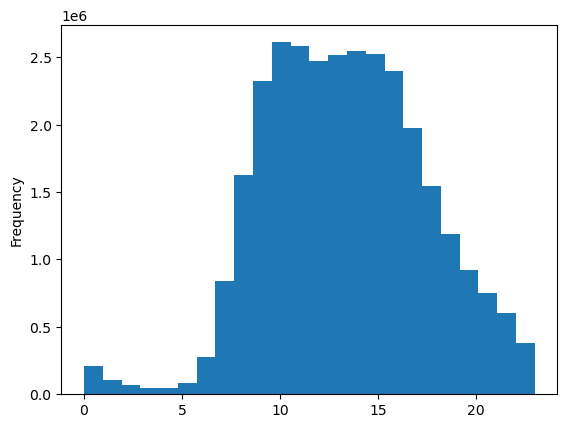

In [6]:
# Creating a Histogram of the Prices column
df_merged['orders_time_of_day'].plot.hist(bins = 24)

#### The histogram demonstrates the fluctuation in orders in a 24 hour period.  We can defer from the histogram that  fewer orders are made between the hours of 12-6am with the most orders being made between the hours of 9-4pm.

In [7]:
# Import verson 3 dataframe
df_ords_prods_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data','orders_products_merged_v3.pkl'))

In [8]:
df_ords_prods_merged.columns

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'orders_time_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'time_of_day', 'Most Orders',
       'max_order', 'loyalty_flag', 'avg_price', 'spending_flag',
       'median_prior_orders', 'frequency_flag'],
      dtype='object')

### Question 4. The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the "loyalty_flag" column.

<Axes: >

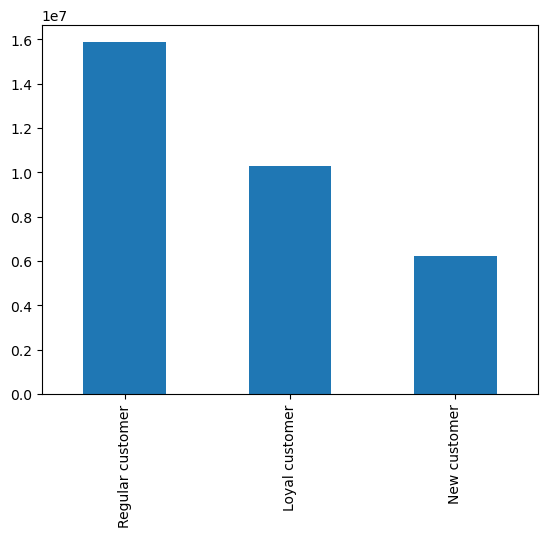

In [9]:
# Creating a bar chart
df_ords_prods_merged['loyalty_flag'].value_counts().plot.bar()

#### The bar chart shows us that Regular customers places the most orders.

### Question 5.  Check whether there's a difference in expenditure (the "prices" column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [10]:
# Create Sample of data
np.random.seed(4)
dev = np.random.rand(len(df_merged)) <= 0.7

In [11]:
dev

array([False,  True, False, ...,  True, False,  True])

In [12]:
np.random.rand(10)

array([0.38405091, 0.93488398, 0.33001357, 0.79419607, 0.42499243,
       0.07757245, 0.35322517, 0.07230925, 0.1155028 , 0.68911252])

In [13]:
# Create a list holding True/False values to test np.random.rant() <= 0.7
dev = np.random.rand(len(df_merged)) <= 0.7

In [14]:
# Store 70% of the samle in the dataframe big
big = df_merged[dev]

In [15]:
# store 30% of the sample in the dataframe small
small = df_merged[~dev]

In [16]:
len(df_merged)

30630852

In [17]:
len(big) + len(small)

30630852

In [18]:
df_2 = small[['orders_time_of_day','prices']]


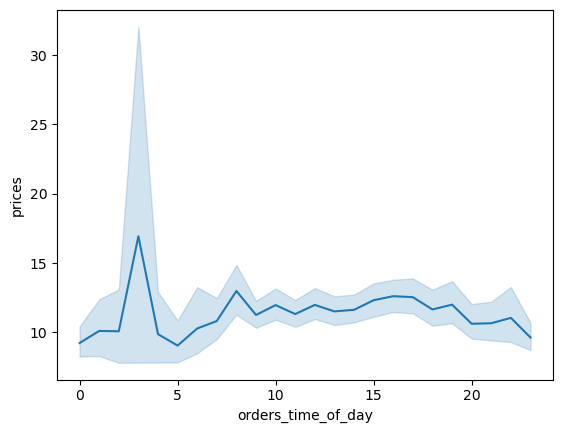

In [19]:
line = sns.lineplot(data = df_2, x = 'orders_time_of_day',y = 'prices')

In [ ]:
# Line plot with 70% data
line_plot = sns.lineplot(data = big, x = 'orders_time_of_day', y = 'prices')

### Expenditures appears higher between 2-3am, and starts to decline thereafter.


In [ ]:
# Export Line plots
line_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_plot_small_otod.png'))

### Question 6. Determine whether there's a connection between age and family situation #### exploring connection between age and number of dependents.

In [ ]:
# Checking small dataframe
df_2 = small[['age','fam_status']]

In [ ]:
line_age_fam = sns.lineplot(data = df_2, x = 'age',y = 'fam_status')

In [ ]:
# Checking small dataframe x='age', y='num_dependants'
line_plot_age = sns.lineplot(data = small, x = 'age',y = 'num_dependants')

In [ ]:
line_plot_age = sns.lineplot(data = big, x = 'age',y = 'num_dependants')

In [ ]:
# Export Line plots
line_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_plot_big_age_depen.png'))

#### I can surmise from the line plot that the age range of 18-24 has zero to at least 1 child, and older customers have more dependants,

### Question 7. Create a scatterplot to explore whether there's a connection between age and spending power [income]- # create a scatterplot using the sns.scatterplot function.

In [ ]:
scatter_plot = sns.scatterplot(x = 'age', y = 'income',data = small)

In [ ]:
# Export scatterplot
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_plot_small_age_income.png'))

In [ ]:
scatter_plot = sns.scatterplot(x = 'age', y = 'income',data = big)

In [ ]:
# Export scatterplot
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_plot_big_age_income.png'))

#### The scatterplot shows that younger adults (18- approx 40 years of age) income is less than adults 45 years of age and up.